# Let's hope it works

## Loading the faces data

In [43]:
pip install selenium

  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 32.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [113]:
import os
import requests
import time
from bs4 import BeautifulSoup
from urllib.parse import quote
from selenium import webdriver

In [112]:
# OPTION 1

def download_images(player_name):
    # Create a directory to save the images
    player_folder_path = f"./raw_data/faces/{player_name}"
    os.makedirs(player_folder_path, exist_ok=True)

    # Define the URL for Getty Images
    encoded_player_name = quote(player_name)
    url = f"https://www.gettyimages.be/photos/{encoded_player_name}?assettype=image&compositions=headshot&family=editorial&numberofpeople=one&sort=best"

    # Configure the Chrome driver (Make sure you have the correct chromedriver installed)
    driver = webdriver.Chrome()

    try:
        # Access the URL
        driver.get(url)
        time.sleep(5)  # Allow time for the page to load

        # Extract image URLs
        image_elements = driver.find_elements("xpath", '//img[contains(@src, "https://media.gettyimages.com")]')

        # Download and save 30 images
        count = 0
        for img in image_elements:
            img_url = img.get_attribute("src")
            img_data = requests.get(img_url).content
            with open(f"{player_folder_path}/{player_name}_{count}.jpg", "wb") as handler:
                handler.write(img_data)
            count += 1
            if count == 30:
                break

        print(f"Downloaded {count} images of {player_name} from Getty Images.")

    except Exception as e:
        print(f"Failed to retrieve images of {player_name} from Getty Images. Error: {e}")

    finally:
        # Close the browser
        driver.quit()

# Example usage
# player_name = input("Enter the football player's name: ")
# download_images(player_name)

Enter the football player's name:  Messi


Downloaded 30 images of Messi from Getty Images.


In [ ]:
#players = ["Neymar", "Erling Haaland", "Bruno Fernandes", "Mohamed Salah", "Harry Kane", "Son Heung-min", "Karim Benzema", "Gareth Bale", "Firminho", "Sadio Mane"]

#for player in players :
    #download_images(player)

## Loading the stats data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Attacking

In [5]:
attacking = pd.read_csv("data/stats/attacking.csv")

In [6]:
attacking.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [7]:
print(f"The shape is : {attacking.shape}")
print(f"The number of unique players is : {attacking['player_name'].nunique()}")

The shape is : (176, 9)
The number of unique players is : 176


In [9]:
print(f"The number of unique teams is : {attacking['club'].nunique()}")

The number of unique teams is : 32


### Total

In [7]:
total = pd.read_csv("raw_data/stats/key_stats.csv")

In [35]:
total['club'].unique()

array(['Real Madrid', 'Liverpool', 'Villarreal', 'Man. City', 'Benfica',
       'Atlético', 'Bayern', 'Chelsea', 'LOSC', 'Inter', 'Salzburg',
       'Ajax', 'Paris', 'Sporting CP', 'Juventus', 'Man. United',
       'Club Brugge', 'Sheriff', 'Wolfsburg', 'Dynamo Kyiv', 'Sevilla',
       'Shakhtar Donetsk', 'Zenit', 'Dortmund', 'Atalanta', 'Porto',
       'Barcelona', 'Young Boys', 'Leipzig', 'Malmö', 'Milan', 'Beşiktaş'],
      dtype=object)

In [36]:
real_condition = total['club'] == 'Real Madrid'
mancity_condition = total['club'] == 'Man. City'

In [39]:
real_players = total[real_condition]['player_name']
real_players.head()

0           Courtois
1    Vinícius Júnior
2            Benzema
3             Modrić
4       Éder Militão
Name: player_name, dtype: object

In [38]:
mancity_players = total[mancity_condition]['player_name']
mancity_players.head()

58           Ederson
59            Mahrez
65    Bernardo Silva
68             Rodri
69      João Cancelo
Name: player_name, dtype: object

In [25]:
total['player_name']

array(['Courtois', 'Vinícius Júnior', 'Benzema', 'Modrić', 'Éder Militão',
       'Alaba', 'Carvajal', 'Casemiro', 'Kroos', 'Mendy', 'Valverde',
       'Nacho', 'Rodrygo', 'Lucas Vázquez', 'Camavinga', 'Asensio',
       'Jović', 'Marcelo', 'E. Hazard', 'Miguel Gutiérrez', 'Ceballos',
       'Mariano Díaz', 'Vallejo', 'Bale', 'Blanco', 'Alisson Becker',
       'Salah', 'Fabinho', 'Robertson', 'Mané', 'Van Dijk',
       'Alexander-Arnold', 'Konaté', 'Henderson', 'Matip',
       'Thiago Alcántara', 'Diogo Jota', 'Keïta', 'Luis Díaz', 'Tsimikas',
       'Firmino', 'Oxlade-Chamberlain', 'Gomez', 'Minamino', 'Milner',
       'Origi', 'Jones', 'N. Williams', 'Morton', 'Phillips', 'Elliott',
       'Woltman', 'Bradley', 'Pau Torres', 'Rulli', 'Parejo', 'Capoue',
       'Albiol', 'Ederson', 'Mahrez', 'Danjuma', 'Vertonghen',
       'Vlachodimos', 'Oblak', 'Foyth', 'Bernardo Silva', 'Lewandowski',
       'Grimaldo', 'Rodri', 'João Cancelo', 'Rüdiger', 'Reinildo',
       'Neuer', 'Weigl', 'Otamen

## Let's create the interface now

### Creating the database

In [8]:
import sqlite3
import glob

In [9]:
# Define the path to your CSV files
csv_files = glob.glob('data/stats/*')

# Create an SQLite database connection
conn = sqlite3.connect('football_analysis.db')

# Iterate through each CSV file and write it to the SQLite database
for file in csv_files:
    table_name = file.split('/')[-1].split('.')[0]  # Extract table name from the filename
    df = pd.read_csv(file)
    df.to_sql(table_name, conn, index=False, if_exists='replace')  # Replace if the table already exists

# Close the connection to the SQLite database
conn.close()

### Loading the queries

In [10]:
conn = sqlite3.connect('football_analysis.sqlite')
c = conn.cursor()

In [11]:
c.execute("""SELECT * FROM attempts WHERE player_name in ?""")
rows = c.fetchall()
c.execute('PRAGMA table_info(attempts)')
columns = [col[1] for col in c.fetchall()]

In [12]:
data = pd.DataFrame(rows, columns = columns)

### Creating the functions

In [13]:
def match_played(ax):
    sns.barplot(x=data[0:5]["player_name"], y=data[0:5]["match_played"], palette="husl", ax=ax)
    ax.set_xlabel('Player Name')
    ax.set_ylabel('Match Played')
    ax.set_title('Match played')

In [18]:
def attempts_target(ax):
    subset_data = data.head()

    players = subset_data['player_name']
    total_attempts = subset_data['total_attempts']
    on_target = subset_data['on_target']

    x = np.arange(len(players))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(x - width/2, total_attempts, width, label='Total Attempts')
    rects2 = ax.bar(x + width/2, on_target, width, label='On Target')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_xlabel('Player Name')
    ax.set_ylabel('Attempts')
    ax.set_title('Total Attempts vs. On Target by Player')
    ax.set_xticks(x)
    ax.set_xticklabels(players)
    ax.legend()

### Plotting the results

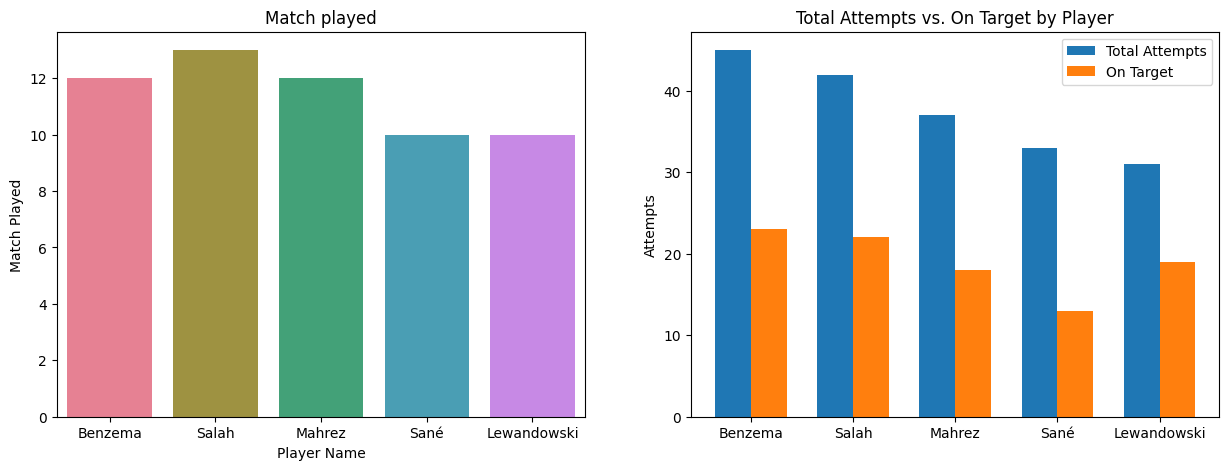

In [19]:
# Create subplots and call the functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Call the functions with the appropriate axes
match_played(ax1)
attempts_target(ax2)

plt.show()